<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/1_Getting_Data_From_guten%2Bsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Unzip the Overall data
!unzip Gutenberg_English_Fiction_1k.zip -d books_set


In [4]:
#Reading the meta data file
import pandas as pd

data = []

import os
file = os.path.abspath('books_set/Gutenberg_English_Fiction_1k/master996.csv')

with open(file, "rb") as myfile:
    # read the header seperately
    # decode it as 'utf-8', remove any special characters, and split it on the comma (or deliminator)
    header = myfile.readline().decode('utf-8').replace('\r\n', '').split(';')
    # read the rest of the data
    for line in myfile:
        row = line.decode('utf-8', errors='ignore').replace('\r\n', '').split(';')
        data.append(row)

# save the data as a dataframe
meta_data = pd.DataFrame(data=data, columns = header)
meta_data.head(5)

,Book_Name,book_id,guten_genre,Author_Name
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067.epub,Detective and Mystery,Stevenson| Burton Egbert
1,The Pupil,pg1032.epub,Literary,James| Henry
2,At Love's Cost,pg10379.epub,Literary,Garvice| Charles
3,The Heart of the Range,pg10473.epub,Western Stories,White| William Patterson
4,The Worshipper of the Image,pg10812.epub,Literary,Gallienne| Richard Le


In [5]:
#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067

meta_data['FileNo'] = meta_data['book_id'].str.replace(r'\D+', '').astype(int)

#Checkign the values

meta_data.sort_values(by=['FileNo'], inplace=True)
meta_data

,Book_Name,book_id,guten_genre,Author_Name,FileNo
961,Alice's Adventures in Wonderland,pg11CarolAlice.epub,Literary,Carroll| Lewis,11
962,Through the Looking-Glass,pg12CarolGlassLook.epub,Literary,Carroll| Lewis,12
995,A Tale of Two Cities,pg98DickensTaleCities.epub,Literary,Dickens| Charles,98
958,Persuasion,pg105JaneAusPersuatn.epub,Literary,Austen| Jane,105
959,Return of Sherlock Holmes,pg108DoyleReturnSherlk.epub,Detective and Mystery,Connan| Doyle,108
...,...,...,...,...,...
863,Kate Vernon: A Tale. Vol. 2 (of 3),pg53356.epub,Literary,Alexander| Mrs.,53356
864,The Touch of Abner,pg53604.epub,Literary,Cody| H. A.,53604
865,Kate Vernon: A Tale. Vol. 3 (of 3),pg53668.epub,Literary,Alexander| Mrs.,53668
964,Mardi: and A Voyage Thither I,pg13720HermanVoyage1.epub,Sea and Adventure,Melville| Herman,137201


In [0]:
import glob

# Getting all files and its names into dict and then converting to dataframe"""

Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit

files = glob.glob("books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction//*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')


In [7]:
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()

#Renaming column names
df.columns = ['File_Name', 'Data']
print(df.head(5))
print(df['File_Name'][0])
df['File_Name'] = df['File_Name'].str.replace("books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction/", "l")
print(df['File_Name'][0])
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)
left = df
right = meta_data
result = pd.merge(left, right , how='inner', on=['FileNo', 'FileNo'])

#Checking resulting dataframe
result.info()

#Dropping unnecessery columns

books=result.drop(['File_Name', 'book_id'], axis=1)
books.head(5)

                                           File_Name                                               Data
0  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>Man proposes ... and wives sometimes interf...
1  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>'There is nothing, sir, too little for so l...
2  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>This story originally appeared in the Weekl...
3  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>The Mystery of Monastery Farm\n<p>On the el...
4  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>Click on this box here or with any of the f...
books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction/pg41330-content.html
lpg41330-content.html
<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File_Name    996 non-null    object
 1   Data         996 non-

,Data,FileNo,Book_Name,guten_genre,Author_Name
0,<p>Man proposes ... and wives sometimes interf...,41330,Mrs. Dorriman: A Novel. Volume 2 of 3,Literary,Chetwynd| Mrs. Henry Wayland
1,"<p>'There is nothing, sir, too little for so l...",28925,Lover or Friend,Literary,Carey| Rosa Nouchette
2,<p>This story originally appeared in the Weekl...,34166,Capricious Caroline,Literary,Rowlands| Effie Adelaide
3,<p>The Mystery of Monastery Farm\n<p>On the el...,11931,The Mystery of Monastery Farm,Literary,Naylor| H. R.
4,<p>Click on this box here or with any of the f...,5240,The Confessions of Harry Lorrequer Complete,Literary,Lever| Charles James


In [8]:
from collections import Counter
print('Dataset shape %s' % Counter(books['guten_genre']))

Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36, 'Western Stories': 18, 'Love and Romance': 18, 'Ghost and Horror': 6, 'Humorous and Wit and Satire': 6, 'Christmas Stories': 5, 'Allegories': 2})


In [9]:
s_a_books = books['guten_genre'] =='Sea and Adventure'
s_a_df = books[s_a_books]
w_s_books = books['guten_genre'] =='Western Stories'
w_s_df = books[w_s_books]
l_r_books = books['guten_genre'] =='Love and Romance'
l_r_df = books[l_r_books]
g_h_books = books['guten_genre'] =='Ghost and Horror'
g_h_df = books[g_h_books]
h_t_books = books['guten_genre'] =='Humorous and Wit and Satire'
h_t_df = books[h_t_books]
l_books = books['guten_genre'] =='Literary'
l_df = books[l_books]
d_m_books = books['guten_genre'] =='Detective and Mystery'
d_m_df = books[d_m_books]
c_s_books = books['guten_genre'] =='Christmas Stories'
c_s_df = books[c_s_books]
a_l_books = books['guten_genre'] =='Allegories'
a_l_df = books[a_l_books]
#sample_books = pd.concat([s_a_df.head(5),w_s_df.head(5),l_r_df.head(5),g_h_df.head(5),h_t_df.head(5),l_df.head(5),d_m_df.head(5),c_s_df.head(5)])
sample_books = pd.concat([s_a_df,d_m_df.head(35),l_df.head(40)])
sample_books.shape

(111, 5)

In [10]:
sample_books.head(5)

,Data,FileNo,Book_Name,guten_genre,Author_Name
9,<p>Blacksheep! Blacksheep!\n<p>Mrs. Howard Fea...,21887,Blacksheep! Blacksheep!,Sea and Adventure,Nicholson| Meredith
17,"<p>DEDICATED TO My Brother, ALLAN MELVILLE.\n<...",137201,Mardi: and A Voyage Thither I,Sea and Adventure,Melville| Herman
19,<p>Shortly.\n<p>... The first shot was just a ...,31083,The Recipe for Diamonds,Sea and Adventure,Hyne| Charles John Cutcliffe Wright
45,<p>The night was as dark as the inside of a co...,27909,Dick Leslie's Luck: A Story of Shipwreck and A...,Sea and Adventure,Lillibridge| Will
60,<p>This book is inscribed to those commanders ...,32114,Command,Sea and Adventure,McFee| William


In [11]:
from collections import Counter
print('Dataset shape %s' % Counter(sample_books['guten_genre']))

Dataset shape Counter({'Literary': 40, 'Sea and Adventure': 36, 'Detective and Mystery': 35})


In [0]:
books = books[books['guten_genre'].isin(['Sea and Adventure','Western Stories','Love and Romance','Christmas Stories','Ghost and Horror'])]
books.head()
from collections import Counter
print('Dataset shape %s' % Counter(books['guten_genre']))

Dataset shape Counter({'Sea and Adventure': 36, 'Western Stories': 18, 'Love and Romance': 18, 'Ghost and Horror': 6, 'Christmas Stories': 5})


In [0]:
from bs4 import BeautifulSoup
sample_books['Data']= [BeautifulSoup(text).get_text() for text in sample_books['Data'] ]
sample_books.head()
sample_books.to_csv('books.csv')

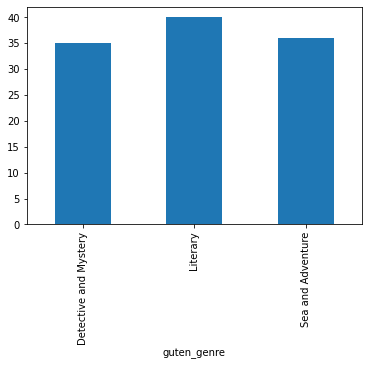

<Figure size 432x288 with 0 Axes>

In [13]:
# This is to see number of books per authors, but so many authors hence useless
#ax = sns.barplot(x = books['Author_Name'], y = books['FileNo'])

#Plotting number of authors per gerne
import matplotlib.pyplot as plt
sample_books.groupby('guten_genre')['Data'].count().plot(kind = 'bar')
plt.show()
plt.clf()


In [0]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('Dataset shape %s' % Counter(books['genre']))
sm= RandomUnderSampler()
X_res, y_res = sm.fit_resample(books['data'], books['genre'])
print('Resampled dataset shape %s' % Counter(y_res))

In [0]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('Dataset shape %s' % Counter(books['genre']))
only_majority = books[books['genre'].isin(['Literary', 'Detective and Mystery', 'Sea and Adventure'])]
print('Dataset shape %s' % Counter(only_majority['genre']))
sm= RandomUnderSampler()
X_res, y_res = sm.fit_resample(only_majority['data'], only_majority['genre'])
print('Resampled dataset shape %s' % Counter(y_res))

Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36, 'Western Stories': 18, 'Love and Romance': 18, 'Humorous and Wit and Satire': 6, 'Ghost and Horror': 6, 'Christmas Stories': 5, 'Allegories': 2})
Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36})


In [14]:
sample_books.head(5)

,Data,FileNo,Book_Name,guten_genre,Author_Name
9,Blacksheep! Blacksheep!\nMrs. Howard Featherst...,21887,Blacksheep! Blacksheep!,Sea and Adventure,Nicholson| Meredith
17,"DEDICATED TO My Brother, ALLAN MELVILLE.\nNot ...",137201,Mardi: and A Voyage Thither I,Sea and Adventure,Melville| Herman
19,Shortly.\n... The first shot was just a rib to...,31083,The Recipe for Diamonds,Sea and Adventure,Hyne| Charles John Cutcliffe Wright
45,The night was as dark as the inside of a cow! ...,27909,Dick Leslie's Luck: A Story of Shipwreck and A...,Sea and Adventure,Lillibridge| Will
60,This book is inscribed to those commanders und...,32114,Command,Sea and Adventure,McFee| William


In [0]:
del sample_books['FileNo']

In [0]:
sample_books.rename(columns = {'Data': 'data', 'guten_genre': 'genre'} , inplace = True)

In [0]:
sample_books.to_csv('books.csv')

In [0]:
import pandas as pd
df = pd.read_csv("books.csv")
df = pd.DataFrame(df)
df = df[['Data', 'guten_genre']]

In [0]:
df.head(5)

,Data,guten_genre
0,"DEDICATED TO My Brother, ALLAN MELVILLE.\nNot ...",Sea and Adventure
1,We were now voyaging straight for Maramma; whe...,Sea and Adventure
2,"""Looking up, he saw a slender little girl in a...",Sea and Adventure
3,FROM the heart of a great hill land Glenavelin...,Sea and Adventure
4,This is a yarn of the days when the clipper sa...,Sea and Adventure


In [0]:
df.to_csv("books.csv")

In [0]:
from imblearn.over_sampling import SMOTENC
from sklearn.feature_extraction.text import TfidfVectorizer
X,y=sample_books.Data, sample_books.guten_genre
print('Original dataset shape %s' % Counter(y))
tfv = TfidfVectorizer()
X_t=tfv.fit_transform(X)
sm = SMOTENC(categorical_features=(X.shape), k_neighbors=1)
X_res, y_res = sm.fit_resample(X_t, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'Humorous and Wit and Satire': 6, 'Christmas Stories': 5, 'Allegories': 2})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({'Allegories': 6, 'Christmas Stories': 6, 'Humorous and Wit and Satire': 6})


In [0]:
from imblearn.over_sampling import SMOTENC
from sklearn.feature_extraction.text import TfidfVectorizer
X,y=sample_books.Data, sample_books.guten_genre
print('Original dataset shape %s' % Counter(y))
sm = SMOTENC(categorical_features=(X.shape), k_neighbors=1)
X_res, y_res = sm.fit_resample(X.values, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [0]:
X = sample_books.Data
type(X)
X.shape

(13,)

In [0]:
from imblearn.over_sampling import RandomOverSampler
X,y=sample_books.Data, sample_books.guten_genre
print('Original dataset shape %s' % Counter(y))
sm = RandomOverSampler(random_state = 42)
X_res, y_res = sm.fit_resample(X.values, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [0]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
data = pd.DataFrame([{'text': 'This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.',
                      'genre': 'minor'},
                     {'text': 'another one first',
                      'genre': 'major'},
                     {'text': 'another one second',
                      'genre': 'major'},
                     {'text': 'This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.',
                      'genre': 'major'}
                     ])
data.head()
X,y=data.text, data.genre
X = X.values.reshape(-1,1)
print('Original dataset shape %s' % Counter(y))
sm = RandomOverSampler(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
print(X_res.shape)


Original dataset shape Counter({'major': 3, 'minor': 1})
Resampled dataset shape Counter({'minor': 3, 'major': 3})
(6, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
data = pd.DataFrame([{'text': 'This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.',
                      'genre': 'minor'},
                     {'text': 'another one first',
                      'genre': 'major'},
                      {'text': 'another random one first',
                      'genre': 'random'},
                     {'text': 'another one second',
                      'genre': 'major'},
                     {'text': 'This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.',
                      'genre': 'major'}
                     ])
data.head()
X,y=data.text, data.genre
X = X.values.reshape(-1,1)
print('Original dataset shape %s' % Counter(y))
sm = RandomOverSampler(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
print(X_res.shape)
print(X_res,y_res)

Original dataset shape Counter({'major': 3, 'minor': 1, 'random': 1})
Resampled dataset shape Counter({'minor': 3, 'major': 3, 'random': 3})
(9, 1)
[['This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.']
 ['another one first']
 ['another random one first']
 ['another one second']
 ['This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.']
 ['This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.']
 ['This is the random text with dialogues an dpuctutaion. he said oh ! my god ! how dare you.']
 ['another random one first']
 ['another random one first']] ['minor' 'major' 'random' 'major' 'major' 'minor' 'minor' 'random'
 'random']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
